In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
FinanceOfferingCase = pd.read_csv('train_fwYjLYX.csv')

In [7]:
FinanceOfferingCase.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [8]:
FinanceOfferingCase.count()

application_date    80402
segment             80402
branch_id           66898
state               80402
zone                66898
case_count          80402
dtype: int64

In [9]:
FinanceOfferingCase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [10]:
FinanceOfferingCase["state"].unique()

array(['WEST BENGAL', 'DELHI', 'KARNATAKA', 'TAMIL NADU', 'UTTAR PRADESH',
       'PUNJAB', 'TELANGANA', 'ANDHRA PRADESH', 'MAHARASHTRA', 'ORISSA',
       'GUJARAT', 'ASSAM', 'JHARKHAND', 'UTTARAKHAND', 'KERALA',
       'CHHATTISGARH', 'BIHAR', 'TRIPURA', 'MADHYA PRADESH', 'HARYANA'],
      dtype=object)

In [11]:
len(FinanceOfferingCase["state"].unique())

20

In [12]:
# replacing the categorical column state with numbers
replace_map = {'state': {'WEST BENGAL':1, 'DELHI':2, 'KARNATAKA':3, 'TAMIL NADU':4, 'UTTAR PRADESH':5,
       'PUNJAB':6, 'TELANGANA':7, 'ANDHRA PRADESH':8, 'MAHARASHTRA':9, 'ORISSA':10,
       'GUJARAT':11, 'ASSAM':12, 'JHARKHAND':13, 'UTTARAKHAND':14, 'KERALA':15,
       'CHHATTISGARH':16, 'BIHAR':17, 'TRIPURA':18, 'MADHYA PRADESH':19, 'HARYANA':20}}


# replacing the categorical column state with numbers- same as above automatically
labels = FinanceOfferingCase['state'].astype('category').cat.categories.tolist()
replace_map_comp = {'state' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'state': {'ANDHRA PRADESH': 1, 'ASSAM': 2, 'BIHAR': 3, 'CHHATTISGARH': 4, 'DELHI': 5, 'GUJARAT': 6, 'HARYANA': 7, 'JHARKHAND': 8, 'KARNATAKA': 9, 'KERALA': 10, 'MADHYA PRADESH': 11, 'MAHARASHTRA': 12, 'ORISSA': 13, 'PUNJAB': 14, 'TAMIL NADU': 15, 'TELANGANA': 16, 'TRIPURA': 17, 'UTTAR PRADESH': 18, 'UTTARAKHAND': 19, 'WEST BENGAL': 20}}


In [13]:
#making a copy of the dataset via the .copy() method 
#to practice each encoding technique to ensure that the original DataFrame stays intact 
#and whatever changes you are doing happen only in the copied one.

FinanceOfferingCase_Copy = FinanceOfferingCase.copy()

In [14]:
#Use the replace() function on the DataFrame by passing the mapping dictionary as argument:

FinanceOfferingCase_Copy.replace(replace_map_comp, inplace=True)


In [15]:

print(FinanceOfferingCase_Copy.head())
print(FinanceOfferingCase_Copy['state'].dtype)

  application_date  segment  branch_id  state  zone  case_count
0       2017-04-01        1        1.0     20  EAST        40.0
1       2017-04-03        1        1.0     20  EAST         5.0
2       2017-04-04        1        1.0     20  EAST         4.0
3       2017-04-05        1        1.0     20  EAST       113.0
4       2017-04-07        1        1.0     20  EAST        76.0
int64


In [16]:
FinanceOfferingCase["branch_id"].unique()

array([  1.,   3.,   5.,   7.,   8.,   9.,  10.,  11.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  29.,  34.,  35.,  36.,  42.,
        43.,  48.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  72.,  73.,  74.,  76.,  77.,  78.,  79.,  82.,  84.,  85.,
       100., 101., 103., 104., 105., 111., 117., 120., 121., 135., 136.,
       137., 147., 159., 165., 202., 207., 217., 248., 249., 250., 251.,
       254., 255., 257., 258., 259., 260., 261., 262., 263., 264., 265.,
       266., 267., 268., 269., 270., 271.,  nan])

In [17]:
#in Python, it's a good practice to typecast categorical features to a category dtype 
#because they make the operations on such columns much faster than the object dtype. 
#You can do the typecasting by using .astype() method on your columns like shown below:

FinanceOfferingCase_Copy['state'] = FinanceOfferingCase_Copy['state'].astype('category')
FinanceOfferingCase_Copy['zone'] = FinanceOfferingCase_Copy['zone'].astype('category')  
FinanceOfferingCase_Copy['branch_id'] = FinanceOfferingCase_Copy['branch_id'].astype('category')

print(FinanceOfferingCase_Copy.dtypes)

application_date      object
segment                int64
branch_id           category
state               category
zone                category
case_count           float64
dtype: object


In [18]:
FinanceOfferingCase_Copy.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,20,EAST,40.0
1,2017-04-03,1,1.0,20,EAST,5.0
2,2017-04-04,1,1.0,20,EAST,4.0
3,2017-04-05,1,1.0,20,EAST,113.0
4,2017-04-07,1,1.0,20,EAST,76.0


In [19]:
#Label Encoding
#Another approach is to encode categorical values with a technique called "label encoding", 
#which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

#You can do label encoding via attributes .cat.codes on your DataFrame's column.

FinanceOfferingCase_Copy['zone'] = FinanceOfferingCase_Copy['zone'].cat.codes
FinanceOfferingCase_Copy['branch_id']=FinanceOfferingCase_Copy['branch_id'].cat.codes

In [20]:
#https://www.datacamp.com/community/tutorials/categorical-data
FinanceOfferingCase_Copy.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,0,20,1,40.0
1,2017-04-03,1,0,20,1,5.0
2,2017-04-04,1,0,20,1,4.0
3,2017-04-05,1,0,20,1,113.0
4,2017-04-07,1,0,20,1,76.0


In [21]:
#again working on original data set, since i obsereved that this df can be divided 
#into 2 segmnets and we can work on these 2 segments seperately as these 2 are totally unrelated
FinanceOfferingCase.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [33]:
# making segmentation for the 2 segments and storing in 2 seperate dataframes
#https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
FinanceOfferingCaseSegment1 = FinanceOfferingCase[FinanceOfferingCase.segment == 1]
FinanceOfferingCaseSegment2 = FinanceOfferingCase[FinanceOfferingCase.segment == 2]

In [34]:
FinanceOfferingCaseSegment1 = FinanceOfferingCaseSegment1.drop('segment', axis=1)

In [35]:
FinanceOfferingCaseSegment1.head()

,application_date,branch_id,state,zone,case_count
0,2017-04-01,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1.0,WEST BENGAL,EAST,76.0


In [36]:
FinanceOfferingCaseSegment2.count()

application_date    13504
segment             13504
branch_id               0
state               13504
zone                    0
case_count          13504
dtype: int64

In [37]:
FinanceOfferingCaseSegment2 = FinanceOfferingCaseSegment2.drop(['segment','branch_id', 'zone'], axis=1)

In [38]:
FinanceOfferingCaseSegment2.head()

,application_date,state,case_count
66898,2017-04-01,ASSAM,0.0
66899,2017-04-02,ASSAM,0.0
66900,2017-04-03,ASSAM,0.0
66901,2017-04-04,ASSAM,0.0
66902,2017-04-05,ASSAM,0.0


In [61]:
#FinanceOfferingCaseSegment2['application_date'] = pd.to_datetime(FinanceOfferingCaseSegment2['application_date'])
FinanceOfferingCaseSegment2['application_date'].str.replace("-","").astype(int)

66898    20170401
66899    20170402
66900    20170403
66901    20170404
66902    20170405
           ...   
80397    20190719
80398    20190720
80399    20190721
80400    20190722
80401    20190723
Name: application_date, Length: 13504, dtype: int32

In [62]:
FinanceOfferingCaseSegment2

,application_date,state,case_count
66898,2017-04-01,ASSAM,0.0
66899,2017-04-02,ASSAM,0.0
66900,2017-04-03,ASSAM,0.0
66901,2017-04-04,ASSAM,0.0
66902,2017-04-05,ASSAM,0.0
...,...,...,...
80397,2019-07-19,WEST BENGAL,1886.0
80398,2019-07-20,WEST BENGAL,1480.0
80399,2019-07-21,WEST BENGAL,1028.0
80400,2019-07-22,WEST BENGAL,1946.0


In [63]:
FinanceOfferingCaseSegment2GroupByState = FinanceOfferingCaseSegment2.groupby(['state'])['case_count'].agg('sum')

In [64]:
FinanceOfferingCaseSegment2GroupByDate= FinanceOfferingCaseSegment2.groupby(['application_date'])['case_count'].agg('sum')

In [65]:
FinanceOfferingCaseSegment2GroupByDateState = FinanceOfferingCaseSegment2.groupby(['application_date','state'])['case_count'].agg({'score':'sum'})

C:\Users\ck14567\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [66]:
FinanceOfferingCaseSegment2GroupByDateState

score
application_date state                
2017-04-01       ASSAM             0.0
                 BIHAR             0.0
                 CHHATTISGARH     34.0
                 GUJARAT           0.0
                 HARYANA           0.0
...                                ...
2019-07-23       PUNJAB            0.0
                 TAMIL NADU     9806.0
                 TRIPURA         165.0
                 UTTAR PRADESH   480.0
                 WEST BENGAL    1984.0

[13504 rows x 1 columns]

In [67]:
FinanceOfferingCaseSegment2GroupByDate

application_date
2017-04-01      897.0
2017-04-02      605.0
2017-04-03     2016.0
2017-04-04     2245.0
2017-04-05     2415.0
               ...   
2019-07-19    29778.0
2019-07-20    26123.0
2019-07-21    12267.0
2019-07-22    27292.0
2019-07-23    29183.0
Name: case_count, Length: 844, dtype: float64

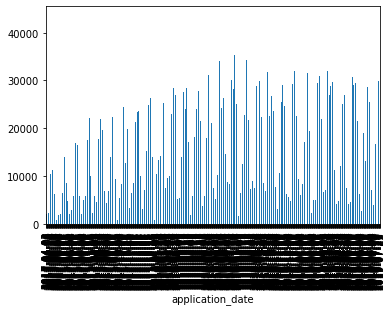

In [68]:
FinanceOfferingCaseSegment2GroupByDate.plot(x="application_date", kind="bar")

In [77]:
FinanceOfferingCaseSegment2GroupByDate.info()
#FinanceOfferingCaseSegment2GroupByDate is of type series, since we have used group by on dataframe.
#So convert FinanceOfferingCaseSegment2GroupByDate to dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 5 columns):
application_date    844 non-null datetime64[ns]
case_count          844 non-null float64
year                844 non-null int64
month               844 non-null int64
day                 844 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 33.1 KB


In [69]:
#FinanceOfferingCaseSegment2GroupByDate['application_date'] = pd.to_datetime(FinanceOfferingCaseSegment2GroupByDate['application_date'])
#df = df[df['Date'].dt.month == 11]
#FinanceOfferingCaseSegment2GroupByDateFromJulyToOct2017 = FinanceOfferingCaseSegment2GroupByDate

KeyError: 'application_date'

In [71]:
FinanceOfferingCaseSegment2GroupByDate = FinanceOfferingCaseSegment2GroupByDate.to_frame().reset_index()

In [72]:
FinanceOfferingCaseSegment2GroupByDate

,application_date,case_count
0,2017-04-01,897.0
1,2017-04-02,605.0
2,2017-04-03,2016.0
3,2017-04-04,2245.0
4,2017-04-05,2415.0
...,...,...
839,2019-07-19,29778.0
840,2019-07-20,26123.0
841,2019-07-21,12267.0
842,2019-07-22,27292.0


In [75]:
FinanceOfferingCaseSegment2GroupByDate['application_date'] = pd.to_datetime(FinanceOfferingCaseSegment2GroupByDate['application_date'])   
FinanceOfferingCaseSegment2GroupByDate['year'] = FinanceOfferingCaseSegment2GroupByDate.application_date.dt.year
FinanceOfferingCaseSegment2GroupByDate['month'] = FinanceOfferingCaseSegment2GroupByDate.application_date.dt.month
FinanceOfferingCaseSegment2GroupByDate['day'] = FinanceOfferingCaseSegment2GroupByDate.application_date.dt.day

In [76]:
FinanceOfferingCaseSegment2GroupByDate

,application_date,case_count,year,month,day
0,2017-04-01,897.0,2017,4,1
1,2017-04-02,605.0,2017,4,2
2,2017-04-03,2016.0,2017,4,3
3,2017-04-04,2245.0,2017,4,4
4,2017-04-05,2415.0,2017,4,5
...,...,...,...,...,...
839,2019-07-19,29778.0,2019,7,19
840,2019-07-20,26123.0,2019,7,20
841,2019-07-21,12267.0,2019,7,21
842,2019-07-22,27292.0,2019,7,22


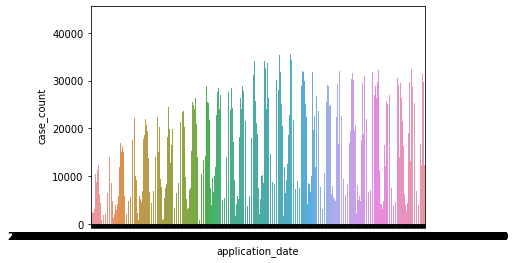

In [78]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDate)

In [83]:
FinanceOfferingCaseSegment2GroupByDateJuly2017 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 7].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2017]

In [84]:
FinanceOfferingCaseSegment2GroupByDateJuly2017

,application_date,case_count,year,month,day
91,2017-07-01,2073.0,2017,7,1
92,2017-07-02,1343.0,2017,7,2
93,2017-07-03,2932.0,2017,7,3
94,2017-07-04,4657.0,2017,7,4
95,2017-07-05,4882.0,2017,7,5
96,2017-07-06,5000.0,2017,7,6
97,2017-07-07,5322.0,2017,7,7
98,2017-07-08,4885.0,2017,7,8
99,2017-07-09,3939.0,2017,7,9
100,2017-07-10,5733.0,2017,7,10


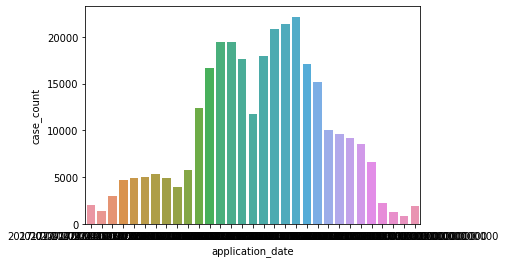

In [85]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateJuly2017)

In [86]:
FinanceOfferingCaseSegment2GroupByDateAug2017 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 8].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2017]
FinanceOfferingCaseSegment2GroupByDateSep2017 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 9].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2017]
FinanceOfferingCaseSegment2GroupByDateOct2017 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 10].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2017]

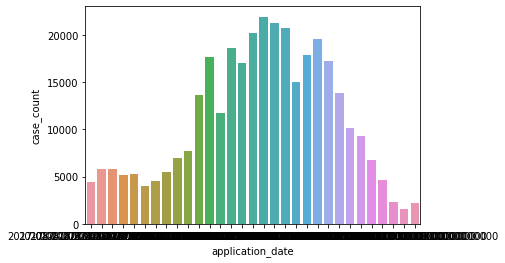

In [87]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateAug2017)

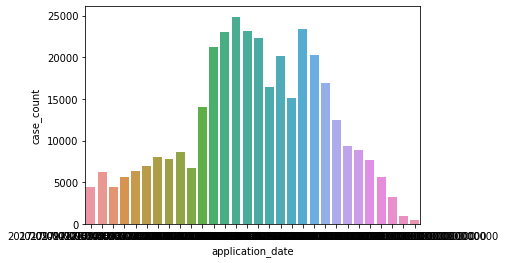

In [88]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateSep2017)

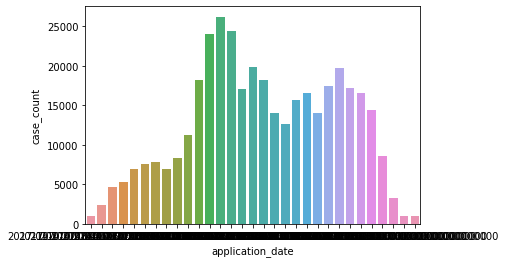

In [89]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateOct2017)

In [91]:
#observed a pattern on monthy data for months of july-oct 2017.. 
#the total case counts are very low in the begining of the month, increase slightly till 10th, 
#touches the peak from 10-25th of every month, and then again are very low in the end of the month
#Will have to do EDA for all the months, to observe if this pattern happens in every month from 2017-2019

In [92]:
FinanceOfferingCaseSegment2GroupByDateNov2017 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 11].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2017]
FinanceOfferingCaseSegment2GroupByDateDec2017 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 12].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2017]
FinanceOfferingCaseSegment2GroupByDateJan2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 1].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateFeb2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 2].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateMar2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 3].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateApr2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 4].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateMay2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 5].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateJun2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 6].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateJul2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 7].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateAug2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 8].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateSep2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 9].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateOct2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 10].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateNov2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 11].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateDec2018 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 12].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2018]
FinanceOfferingCaseSegment2GroupByDateJan2019 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 1].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2019]
FinanceOfferingCaseSegment2GroupByDateFeb2019 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 2].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2019]
FinanceOfferingCaseSegment2GroupByDateMar2019 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 3].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2019]
FinanceOfferingCaseSegment2GroupByDateApr2019 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 4].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2019]
FinanceOfferingCaseSegment2GroupByDateMay2019 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 5].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2019]
FinanceOfferingCaseSegment2GroupByDateJun2019 = FinanceOfferingCaseSegment2GroupByDate.loc[FinanceOfferingCaseSegment2GroupByDate['month'] == 6].loc[FinanceOfferingCaseSegment2GroupByDate['year'] == 2019]

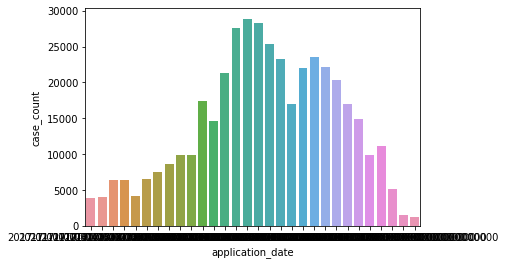

In [94]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateNov2017)

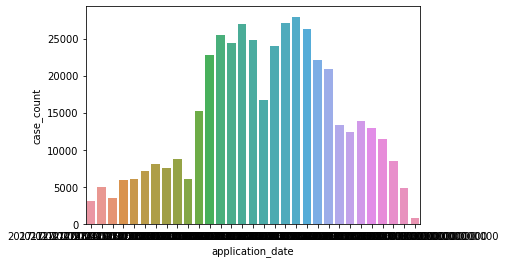

In [95]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateDec2017)

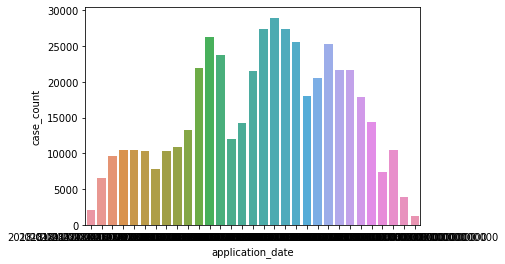

In [97]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateJan2018)

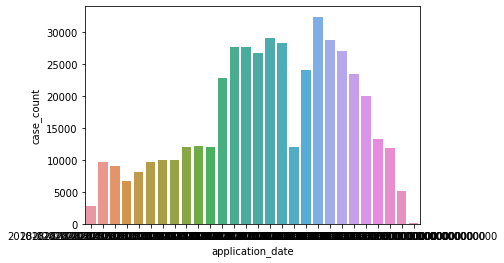

In [98]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateFeb2018)

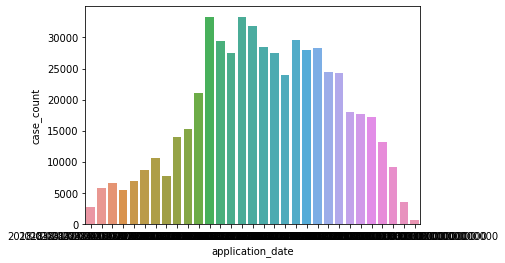

In [99]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateMar2018)

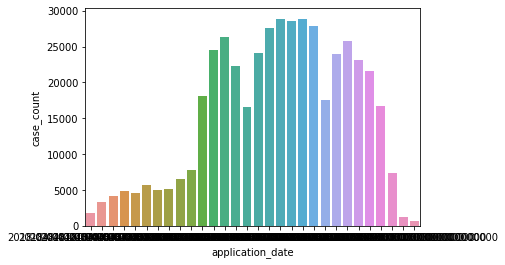

In [100]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateApr2018)

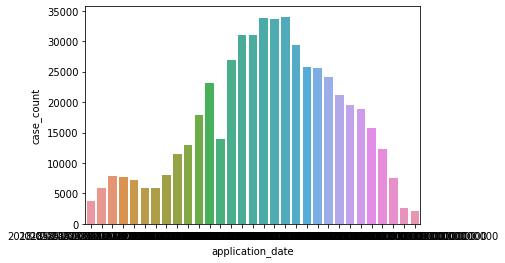

In [101]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateMay2018)

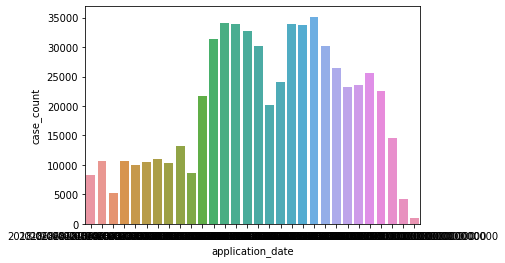

In [102]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateJun2018)

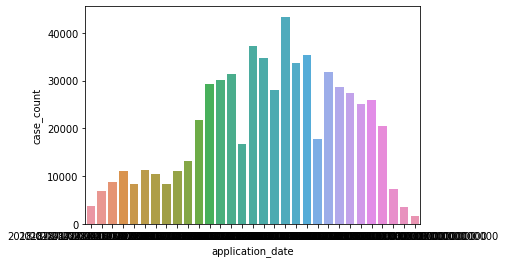

In [103]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateJul2018)

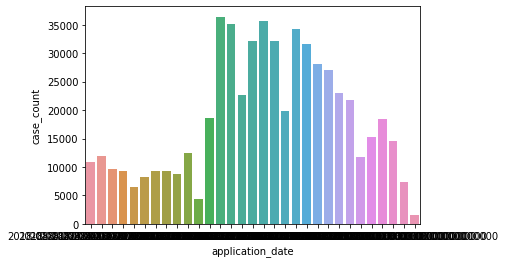

In [104]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateAug2018)

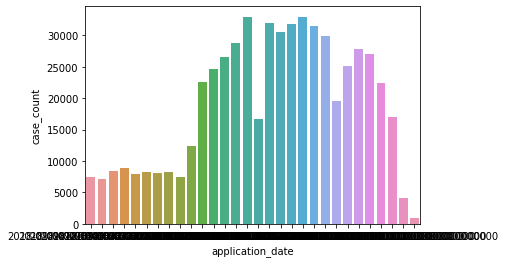

In [105]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateSep2018)

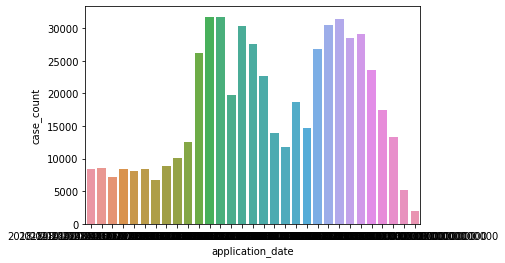

In [106]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateOct2018)

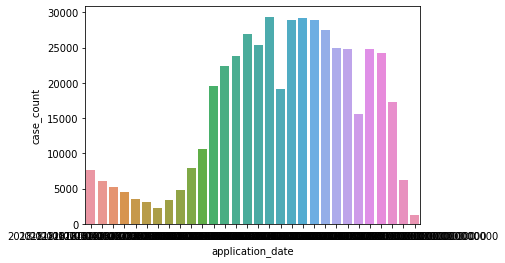

In [107]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateNov2018)

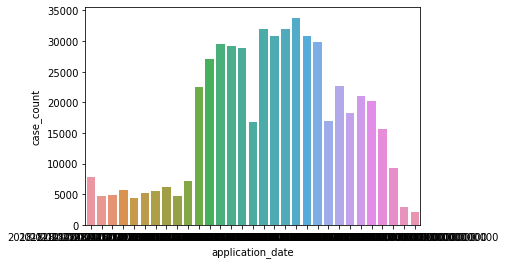

In [108]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateDec2018)

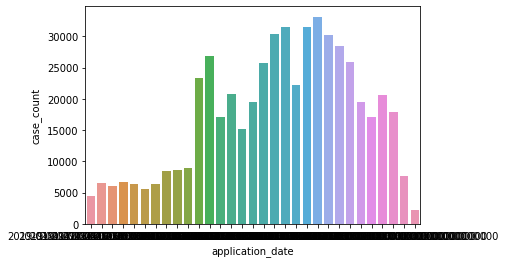

In [109]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateJan2019)

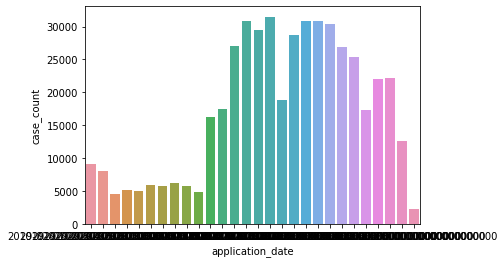

In [110]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateFeb2019)

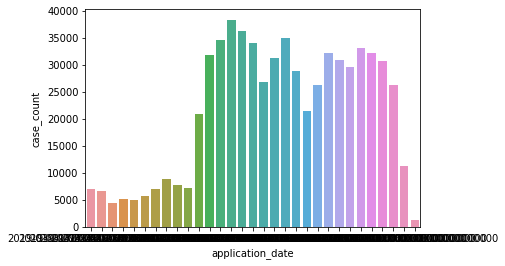

In [111]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateMar2019)

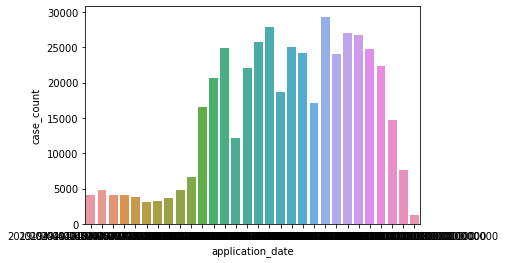

In [112]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateApr2019)

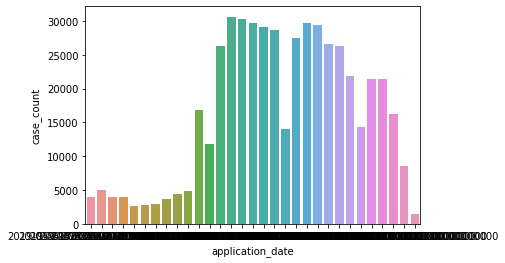

In [113]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateMay2019)

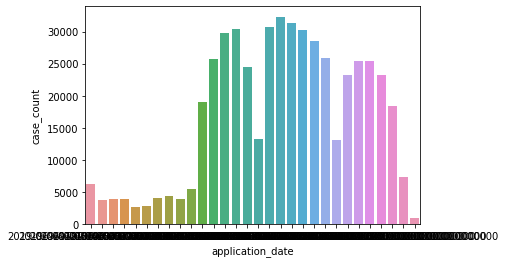

In [114]:
sns.barplot(x='application_date',y='case_count',data=FinanceOfferingCaseSegment2GroupByDateJun2019)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble.forest import RandomForestClassifier,ExtraTreesClassifier
# from sklearn.ensemble.bagging import BaggingClassifier
# from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# model_gbc=GradientBoostingClassifier();
# model_dt=DecisionTreeClassifier()
# model_lr=LogisticRegression()
# model_rf=RandomForestClassifier()
# model_lda=LinearDiscriminantAnalysis()
# model_etr=ExtraTreesClassifier()
# model_n=KNeighborsClassifier()
# model_gnb=GaussianNB()
# model_bca=BaggingClassifier()

# model_gbc.fit(X_train,y_train)
# model_dt.fit(X_train,y_train)
# model_lr.fit(X_train,y_train)
# model_rf.fit(X_train,y_train)
# model_lda.fit(X_train,y_train)
# model_etr.fit(X_train,y_train)
# model_n.fit(X_train,y_train)
# model_gnb.fit(X_train,y_train)
# model_bca.fit(X_train,y_train)


# print(model_gbc.score(X_test,y_test),' gbc')
# print(model_dt.score(X_test,y_test),' dt')
# print(model_lr.score(X_test,y_test),' lr')
# print(model_rf.score(X_test,y_test),' rf')
# print(model_lda.score(X_test,y_test),' lda')
# print(model_etr.score(X_test,y_test),' etr')
# print(model_n.score(X_test,y_test),' n')
# print(model_gnb.score(X_test,y_test),' gnb')
# print(model_bca.score(X_test,y_test),' bca')